In [1]:
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings Suppression for Readiability
import warnings

In [2]:
# COnvert csv file to a pandas dataframe dataset
sales_df = pd.read_csv("Data_Sets/SuperMarketSales.csv")

In [3]:
sales_df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


# Initial Data Exploration

In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
sales_df['Date']

0       1/5/2019
1       3/8/2019
2       3/3/2019
3      1/27/2019
4       2/8/2019
         ...    
995    1/29/2019
996     3/2/2019
997     2/9/2019
998    2/22/2019
999    2/18/2019
Name: Date, Length: 1000, dtype: object

#### The Date column is currenlty storing the date of transcation as string object. Converting the dates from string object to datetime objects.

In [6]:
sales_df['Date'] = pd.to_datetime(sales_df["Date"])

sales_df['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [7]:
sales_df.set_index('Date', inplace = True)

sales_df.sort_index(inplace = True)

sales_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,4.761905,8.448,6.3
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,4.761905,29.583,7.7
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,4.761905,19.036,5.7
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,4.761905,5.408,6.9
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,4.761905,6.287,5.0


In [8]:
# Add new column with the day of the week
sales_df['day_of_week'] = sales_df.index.dayofweek

# Map numerical day of the week to actual day names
day_map = {0:'Monday', 1:'Tuesday', 2:'Wednesday',4:'Thursaday',5:'Friday',6:'Saturaday',7:'Sunday'}
sales_df['day_of_week'] = sales_df['day_of_week'].map(day_map)

#COnfirm column was added successfully
sales_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,day_of_week
Date,,,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,4.761905,8.448,6.3,Tuesday
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,4.761905,29.583,7.7,Tuesday
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,4.761905,19.036,5.7,Tuesday
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,4.761905,5.408,6.9,Tuesday
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,4.761905,6.287,5.0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-30,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,14:43,Ewallet,874.98,4.761905,43.749,6.0,Friday
2019-03-30,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,12:51,Credit card,81.44,4.761905,4.072,9.5,Friday
2019-03-30,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,20:37,Cash,290.46,4.761905,14.523,6.7,Friday


In [9]:
# Determine the number of transcations that occured at each branch
sales_df['Branch'].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

In [10]:
# Determine the number of transcations that occured at each city of Myanmar
sales_df['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

In [11]:
sales_df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


# Data Cleaning

In [12]:
# count number of duplicate rows
sales_df.duplicated().sum()

0

In [13]:
# Remove coumns with incorrect calculations
corrected_sales_df = sales_df.drop(['gross income', 'gross margin percentage'], axis=1)

# COnfirm column removal was successful
corrected_sales_df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,Rating,day_of_week
Date,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,6.3,Tuesday
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,7.7,Tuesday
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,5.7,Tuesday
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,6.9,Tuesday
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,5.0,Tuesday


In [14]:
# Rename column to more accurate description
corrected_sales_df.rename(columns={'cogs':'Pre-tax total'}, inplace = True)

# confirm column renaming was successful
corrected_sales_df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,Pre-tax total,Rating,day_of_week
Date,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,6.3,Tuesday
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,7.7,Tuesday
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,5.7,Tuesday
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,6.9,Tuesday
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,5.0,Tuesday


In [15]:
corrected_sales_df['Payment'].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

In [16]:
# Update spelling of payment method
#corrected_sales_df['Payment']

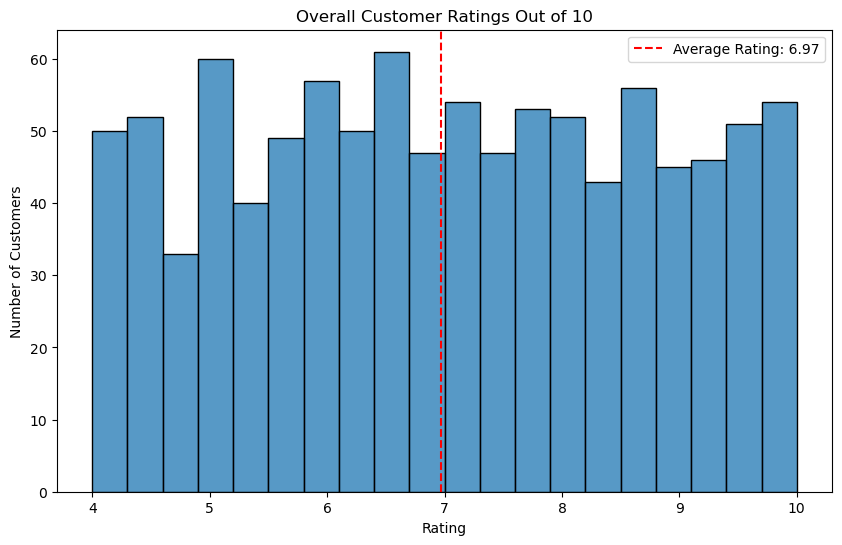

In [17]:
# Supress specific warnings for readeability resons
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated", category=FutureWarning)

# Create a histogram of overall customer rating
plt.figure(figsize=(10,6))
sns.histplot(data=corrected_sales_df, x= 'Rating', bins=20)

# Set title and labels for x-axis and y-axis
plt.title('Overall Customer Ratings Out of 10')
plt.xlabel('Rating')
plt.ylabel('Number of Customers')

# Add the average rating as  vertical dashed line to the histogram
average_rating = corrected_sales_df['Rating'].mean()
plt.axvline(x=average_rating, color='red', linestyle='--', label='Average Rating: {:.2f}'.format(average_rating))
plt.legend()

# Display the hidtogram
plt.show()

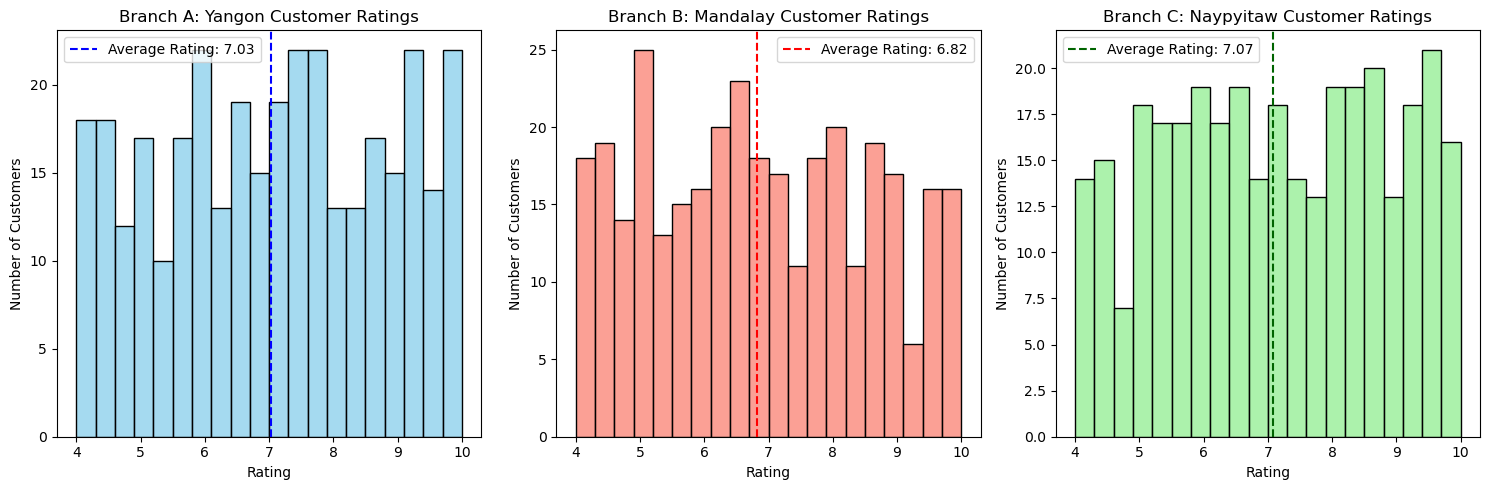

In [21]:
# Create subsets of the data for each branch using Boolean masks
yangon_df = corrected_sales_df[corrected_sales_df['City'] == 'Yangon']
mandalay_df = corrected_sales_df[corrected_sales_df['City'] == 'Mandalay']
naypyitaw_df = corrected_sales_df[corrected_sales_df['City'] == 'Naypyitaw']

#set up 3 histograms side by side
fig,axes=plt.subplots( nrows=1 ,ncols=3 , figsize=(15,5))
sns.histplot(data=yangon_df, x='Rating', bins=20, ax=axes[0] , color='skyblue')
sns.histplot(data=mandalay_df, x='Rating', bins=20, ax=axes[1] , color='salmon')
sns.histplot(data=naypyitaw_df, x='Rating', bins=20, ax=axes[2] , color='lightgreen')

#set titles , x-axis labels and y axis labels
axes[0].set_title('Branch A: Yangon Customer Ratings')
axes[1].set_title('Branch B: Mandalay Customer Ratings')
axes[2].set_title('Branch C: Naypyitaw Customer Ratings')

axes[0].set_xlabel('Rating')
axes[1].set_xlabel('Rating')
axes[2].set_xlabel('Rating')

axes[0].set_ylabel('Number of Customers')
axes[1].set_ylabel('Number of Customers')
axes[2].set_ylabel('Number of Customers')

# add the average ratings as vertical dashed line to the 3 histograms

yangon_average_rating = yangon_df['Rating'].mean()
mandalay_average_rating = mandalay_df['Rating'].mean()
naypyitaw_average_rating = naypyitaw_df['Rating'].mean()

axes[0].axvline(x=yangon_average_rating, color='blue' , linestyle='--' ,label='Average Rating: {:.2f}'.format(yangon_average_rating))
axes[1].axvline(x=mandalay_average_rating, color='red' , linestyle='--' ,label='Average Rating: {:.2f}'.format(mandalay_average_rating))
axes[2].axvline(x=naypyitaw_average_rating, color='darkgreen' , linestyle='--' ,label='Average Rating: {:.2f}'.format(naypyitaw_average_rating))

axes[0].legend()
axes[1].legend()
axes[2].legend()

#arrange the subplots neatly
plt.tight_layout()

#Display the 3 histograms
plt.show()

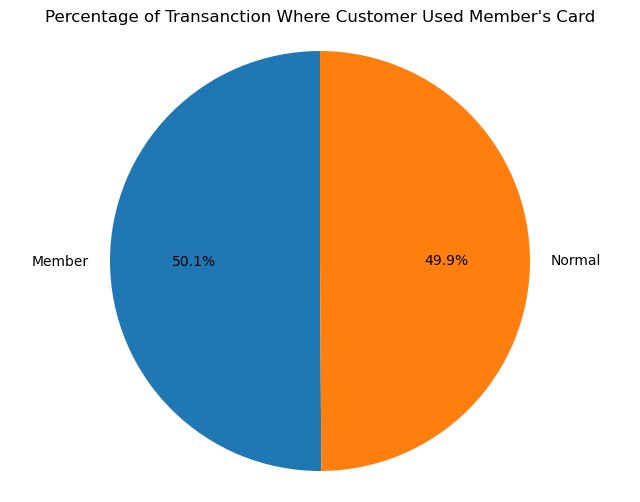

In [24]:
# Find the percentage for "Member" customers vs "Normal" customers
customer_type_counts = corrected_sales_df['Customer type'].value_counts(normalize = True)

# Create a pie chart to visualize the results
plt.figure(figsize=(8,6))
plt.pie(customer_type_counts, labels = customer_type_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Percentage of Transanction Where Customer Used Member\'s Card')
plt.axis('equal')

# Display the pie chart
plt.show()

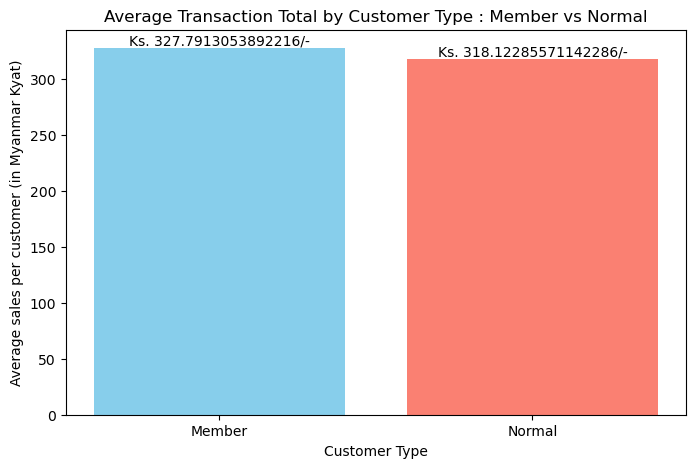

In [27]:
# Create subsets of the data for each customer type using Boolean masks
member_df = corrected_sales_df[corrected_sales_df['Customer type'] == 'Member']
normal_df = corrected_sales_df[corrected_sales_df['Customer type'] == 'Normal']

# Find average sales per customer type
avg_sales_per_member_customer = member_df['Total'].mean()
avg_sales_per_normal_customer = normal_df['Total'].mean()

# Setup a barplot
values = [avg_sales_per_member_customer, avg_sales_per_normal_customer]
plt.figure(figsize=(8, 5))
bars = plt.bar(['Member', 'Normal'], values, color=['skyblue', 'salmon'])

# add title, x-axis label and y-axis label
plt.xlabel('Customer Type')
plt.ylabel('Average sales per customer (in Myanmar Kyat)')
plt.title('Average Transaction Total by Customer Type : Member vs Normal')

# add labels for average sales values
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'Ks. {value}/-', ha='center', va='bottom')

# show the plot
plt.show()

## How common are the each of the payment method

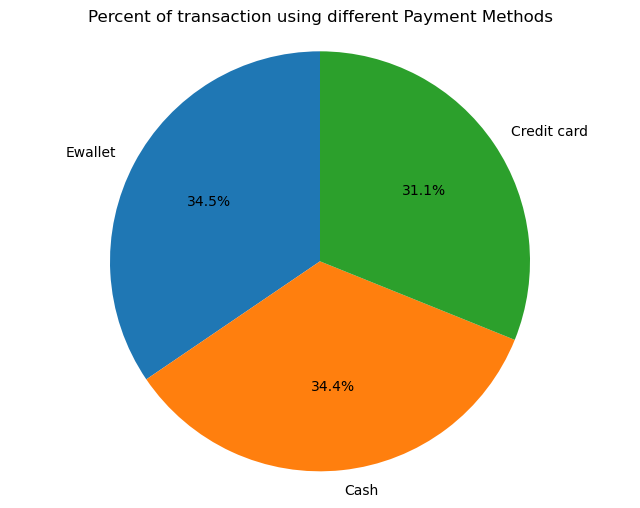

In [29]:
# Find the percentage for payment types
payment_type_counts = corrected_sales_df['Payment'].value_counts(normalize = True)

# Create  Pie chart to visaulaize the results
plt.figure(figsize=(8,6))
plt.pie(payment_type_counts, labels=payment_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percent of transaction using different Payment Methods')
plt.axis('equal')

# Display the pie chart
plt.show()

### Which of the 3 branches of the supermarket had the highest total sales ?

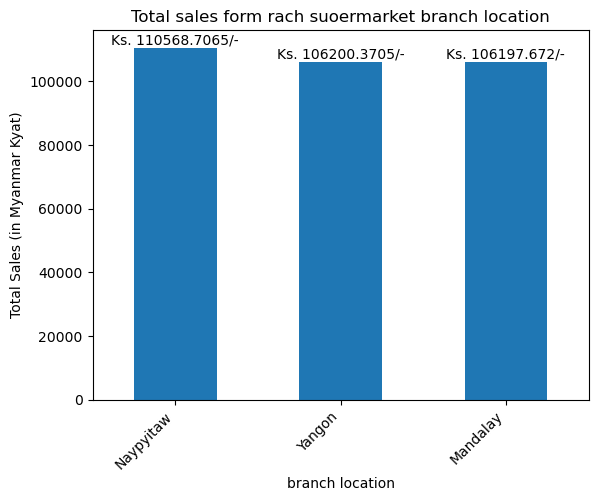

In [32]:
# Create a Dataflow with the total revenue grouped by city
location_totals_df =  corrected_sales_df.groupby('City').sum('Total')

# Isolate the sumed 'Total' column and sort form highest to lowest
location_totals =  location_totals_df['Total'].sort_values(ascending=False)

# Create a barplot visualization
ax = location_totals.plot.bar()

# Add axis labels and title
plt.title('Total sales form rach suoermarket branch location')
plt.xlabel('branch location')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylabel('Total Sales (in Myanmar Kyat)')

# add total transaction amount labels
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'Ks. {bar.get_height()}/-', ha='center', va='bottom')

# show the plot
plt.show()

### which product lines drove the highest sales? Which were the most common?

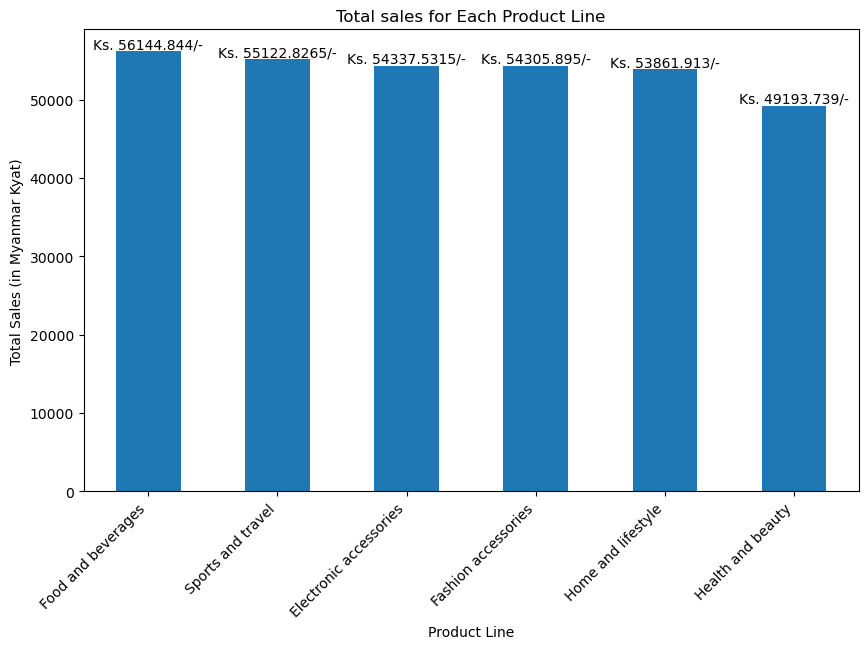

In [34]:
# Create a dataflow with total revenue grouped by city
product_line_totals_df =  corrected_sales_df.groupby('Product line').sum('Total')

# Isolate the sumed 'Total' column and sort form highest to lowest
product_line_totals =  product_line_totals_df['Total'].sort_values(ascending=False)

# Create a barplot visualization
plt.figure(figsize=(10,6))
ax = product_line_totals.plot.bar()

# Add axis labels and title
plt.title('Total sales for Each Product Line')
plt.xlabel('Product Line')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylabel('Total Sales (in Myanmar Kyat)')

# add total transaction amount labels
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'Ks. {bar.get_height()}/-', ha='center', va='bottom')

# show the plot
plt.show()

### How did the sales data function over time ?

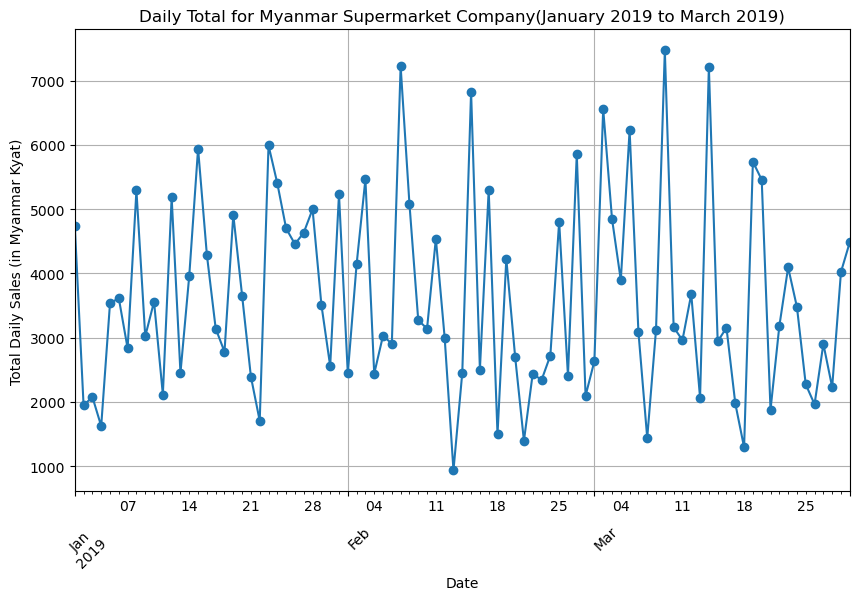

In [37]:
# Grouped data by date and calculate total sales for each day
daily_sales = corrected_sales_df.groupby('Date')['Total'].sum()

# Plot the line chart
plt.figure(figsize=(10,6))
daily_sales.plot(marker='o', linestyle='-')

# Add labels and title
plt.title('Daily Total for Myanmar Supermarket Company(January 2019 to March 2019)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Total Daily Sales (in Myanmar Kyat)')

# Show the plot
plt.grid(True) # add grid lines for readability
plt.show()